<a href="https://colab.research.google.com/github/kirtiman24/Stock-Price-Prediction/blob/master/StockIndex_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data=pd.read_csv('/content/Feb.csv')

In [160]:
data.tail(5)

,Date,Open,High,Low,Close
715,24-February-2020,12161.99,12161.99,11923.13,11941.07
716,25-February-2020,11985.02,12001.83,11885.83,11903.01
717,26-February-2020,11875.68,11887.67,11742.24,11777.28
718,27-February-2020,11794.70,11794.70,11633.62,11729.59
719,28-February-2020,11539.19,11539.19,11268.31,11292.68


In [91]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    720 non-null    object 
 1   Open    720 non-null    float64
 2   High    720 non-null    float64
 3   Low     720 non-null    float64
 4   Close   720 non-null    float64
dtypes: float64(4), object(1)
memory usage: 28.2+ KB


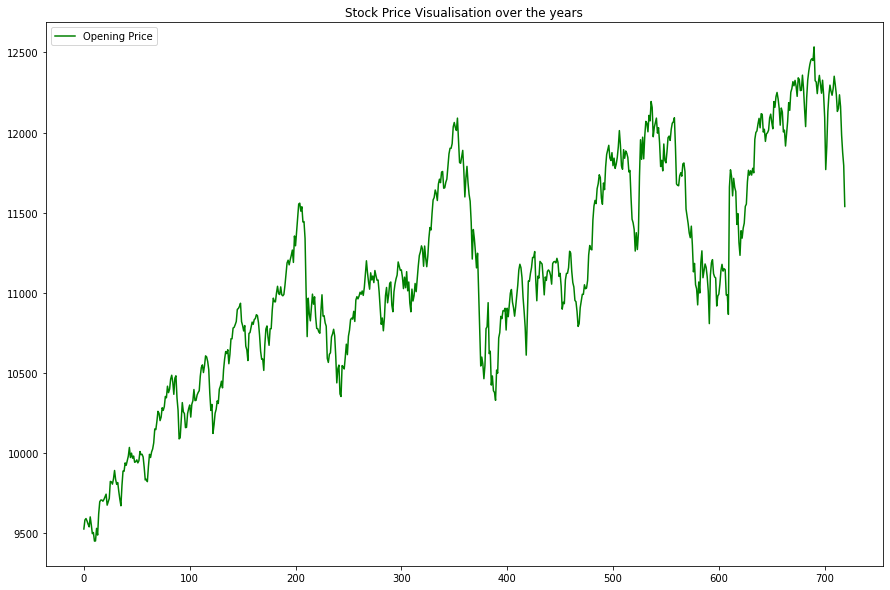

In [102]:
plt.figure(figsize=(15,10))
plt.plot(data["Open"],color='green',label='Opening Price')

plt.title('Stock Price Visualisation over the years')

plt.legend(loc='upper left')
plt.show()

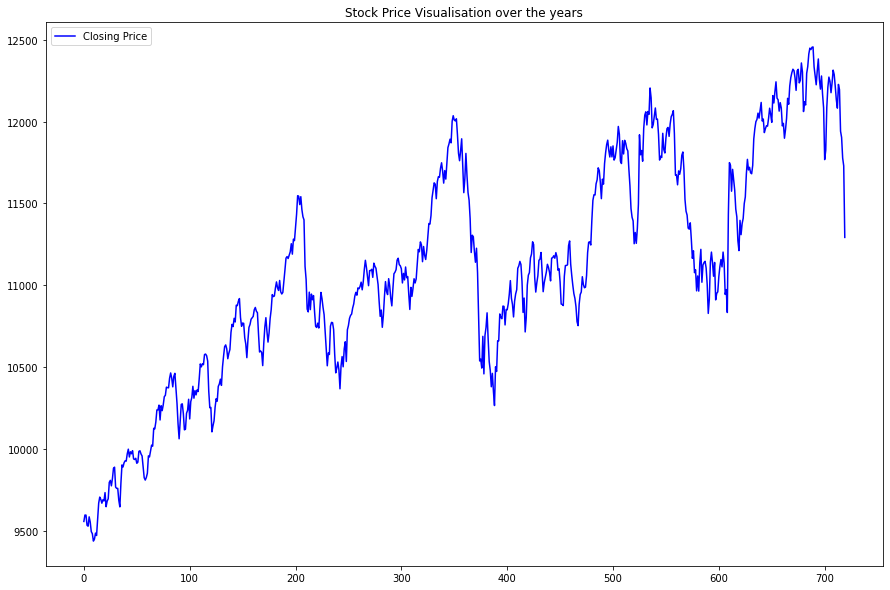

In [84]:
plt.figure(figsize=(15,10))
plt.plot(data["Close"],color='blue',label='Closing Price')

plt.title('Stock Price Visualisation over the years')

plt.legend(loc='upper left')
plt.show()

In [0]:
train_data=data.drop(columns='Date',axis=1)

In [0]:
 #Data Preprocessing
 from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_data = sc.fit_transform(train_data)


In [87]:
print(train_data)

[[0.02450656 0.03168679 0.03382325 0.03975527]
 [0.04270318 0.04562833 0.04286251 0.0526778 ]
 [0.04564241 0.04531895 0.04736385 0.052585  ]
 ...
 [0.78625375 0.78882853 0.77406175 0.77512338]
 [0.75998235 0.75855185 0.73795126 0.75931738]
 [0.67709023 0.67534227 0.61650471 0.61451142]]


In [0]:
#Data Preparation
X_train = []
y_train = []
for i in range(60, 719):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
     

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [118]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
659/659 [==============================] - 5s 7ms/step - loss: 0.0644
Epoch 2/100
659/659 [==============================] - 3s 4ms/step - loss: 0.0199
Epoch 3/100
659/659 [==============================] - 3s 4ms/step - loss: 0.0148
Epoch 4/100
659/659 [==============================] - 3s 4ms/step - loss: 0.0122
Epoch 5/100
659/659 [==============================] - 3s 5ms/step - loss: 0.0117
Epoch 6/100
659/659 [==============================] - 3s 5ms/step - loss: 0.0118
Epoch 7/100
659/659 [==============================] - 3s 5ms/step - loss: 0.0107
Epoch 8/100
659/659 [==============================] - 3s 5ms/step - loss: 0.0117
Epoch 9/100
659/659 [==============================] - 3s 5ms/step - loss: 0.0108
Epoch 10/100
659/659 [==============================] - 3s 5ms/step - loss: 0.0104
Epoch 11/100
659/659 [==============================] - 3s 5ms/step - loss: 0.0112
Epoch 12/100
659/659 [==============================] - 3s 5ms/step - loss: 0.0086
Epoch 13/100


In [163]:
test_data=pd.read_csv('TestData.csv')
test_data.head(5)

  

,Open
0,9527.64
1,9583.73
2,9592.79
3,9577.44
4,9557.31


In [0]:
inputs=test_data[659:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


In [0]:
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_indices = regressor.predict(X_test)
predicted_stock_indices = sc.inverse_transform(predicted_stock_indices)

In [204]:
print((predicted_stock_indices))

[[11712.972 ]
 [11559.447 ]
 [11446.363 ]
 [11344.848 ]
 [11350.263 ]
 [11361.639 ]
 [11215.062 ]
 [11008.847 ]
 [10722.7295]
 [10422.16  ]
 [ 9957.217 ]
 [ 9709.682 ]
 [ 9564.364 ]
 [ 9448.055 ]
 [ 9175.765 ]
 [ 8891.532 ]
 [ 8650.589 ]
 [ 8452.682 ]
 [ 8288.801 ]
 [ 8245.887 ]
 [ 8389.347 ]
 [ 8580.61  ]
 [ 8719.054 ]
 [ 8799.12  ]
 [ 8801.693 ]
 [ 8770.676 ]
 [ 8777.236 ]
 [ 8867.01  ]
 [ 9037.758 ]
 [ 9224.073 ]
 [ 9316.121 ]
 [ 9396.743 ]
 [ 9500.91  ]
 [ 9530.517 ]
 [ 9492.689 ]
 [ 9476.136 ]
 [ 9479.151 ]
 [ 9497.71  ]
 [ 9546.306 ]
 [ 9610.532 ]]


In [195]:
actual_stock_indices=test_data[0:40]
print((actual_stock_indices))

       Open
0   9527.64
1   9583.73
2   9592.79
3   9577.44
4   9557.31
5   9540.91
6   9602.95
7   9554.11
8   9498.81
9   9505.45
10  9452.10
11  9452.98
12  9531.48
13  9489.66
14  9622.49
15  9697.10
16  9708.23
17  9708.15
18  9700.80
19  9712.33
20  9728.60
21  9744.80
22  9676.24
23  9696.49
24  9718.11
25  9824.57
26  9821.28
27  9807.34
28  9840.97
29  9892.48
30  9836.49
31  9805.87
32  9817.27
33  9761.34
34  9712.87
35  9672.35
36  9799.77
37  9888.87
38  9887.66
39  9939.93


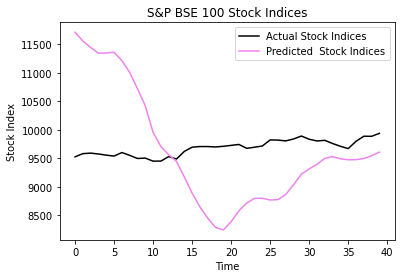

In [208]:
plt.plot(actual_stock_indices, color = 'black', label = 'Actual Stock Indices')
plt.plot(predicted_stock_indices, color = 'violet', label = 'Predicted  Stock Indices')
plt.title('S&P BSE 100 Stock Indices')
plt.xlabel('Time')
plt.ylabel('Stock Index')
plt.legend()
plt.show()